# INTRODUCTION

Maternal and child health are central to global healthcare goals, with the reduction of preventable child and maternal mortality being a key target in the United Nations’ Sustainable Development Agenda. The challenge remains particularly pressing in low-resource settings, where access to timely medical interventions is limited. One of the most critical aspects of improving maternal and fetal health outcomes is the early detection of potential complications during pregnancy.

Cardiotocograms (CTGs) are a vital tool used to monitor fetal health. By capturing real-time data on fetal heart rate (FHR), fetal movements, and uterine contractions, CTGs provide healthcare professionals with valuable insights that can help identify signs of fetal distress and guide timely interventions. However, with a growing volume of CTG data, healthcare providers face the challenge of efficiently interpreting these records, making it difficult to detect abnormalities at the earliest stages.

In this project, we explore a dataset containing 2,126 records of CTG exams, classified into three categories: Normal, Suspect, and Pathological. By applying machine learning techniques, including Logistic Regression, Support Vector Machines (SVM), Random Forest, and K-Nearest Neighbors (KNN), this project aims to develop predictive models that classify CTG data based on the severity of fetal health. Throughout the process, we will perform data cleaning, feature reduction, and exploratory data visualization to uncover meaningful patterns and enhance the effectiveness of these models in informing clinical decision-making.

The ultimate goal of this project is to contribute to better fetal health monitoring, which can help reduce preventable maternal and child mortality and improve healthcare outcomes, especially in regions with limited resources.

# LOADING THE DATASET

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('/content/fetal_health.csv')

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# EXPLORATORY DATA ANALYSIS

In [ ]:
data.shape #getting the shape of the dataset

(2126, 22)

In [ ]:
data.describe().T #getting statistical information about the dataset

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
data.info() #checking the datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data['fetal_health'].value_counts() #checking the target variable

,count
fetal_health,
1.0,1655
2.0,295
3.0,176


**PLOTTING**

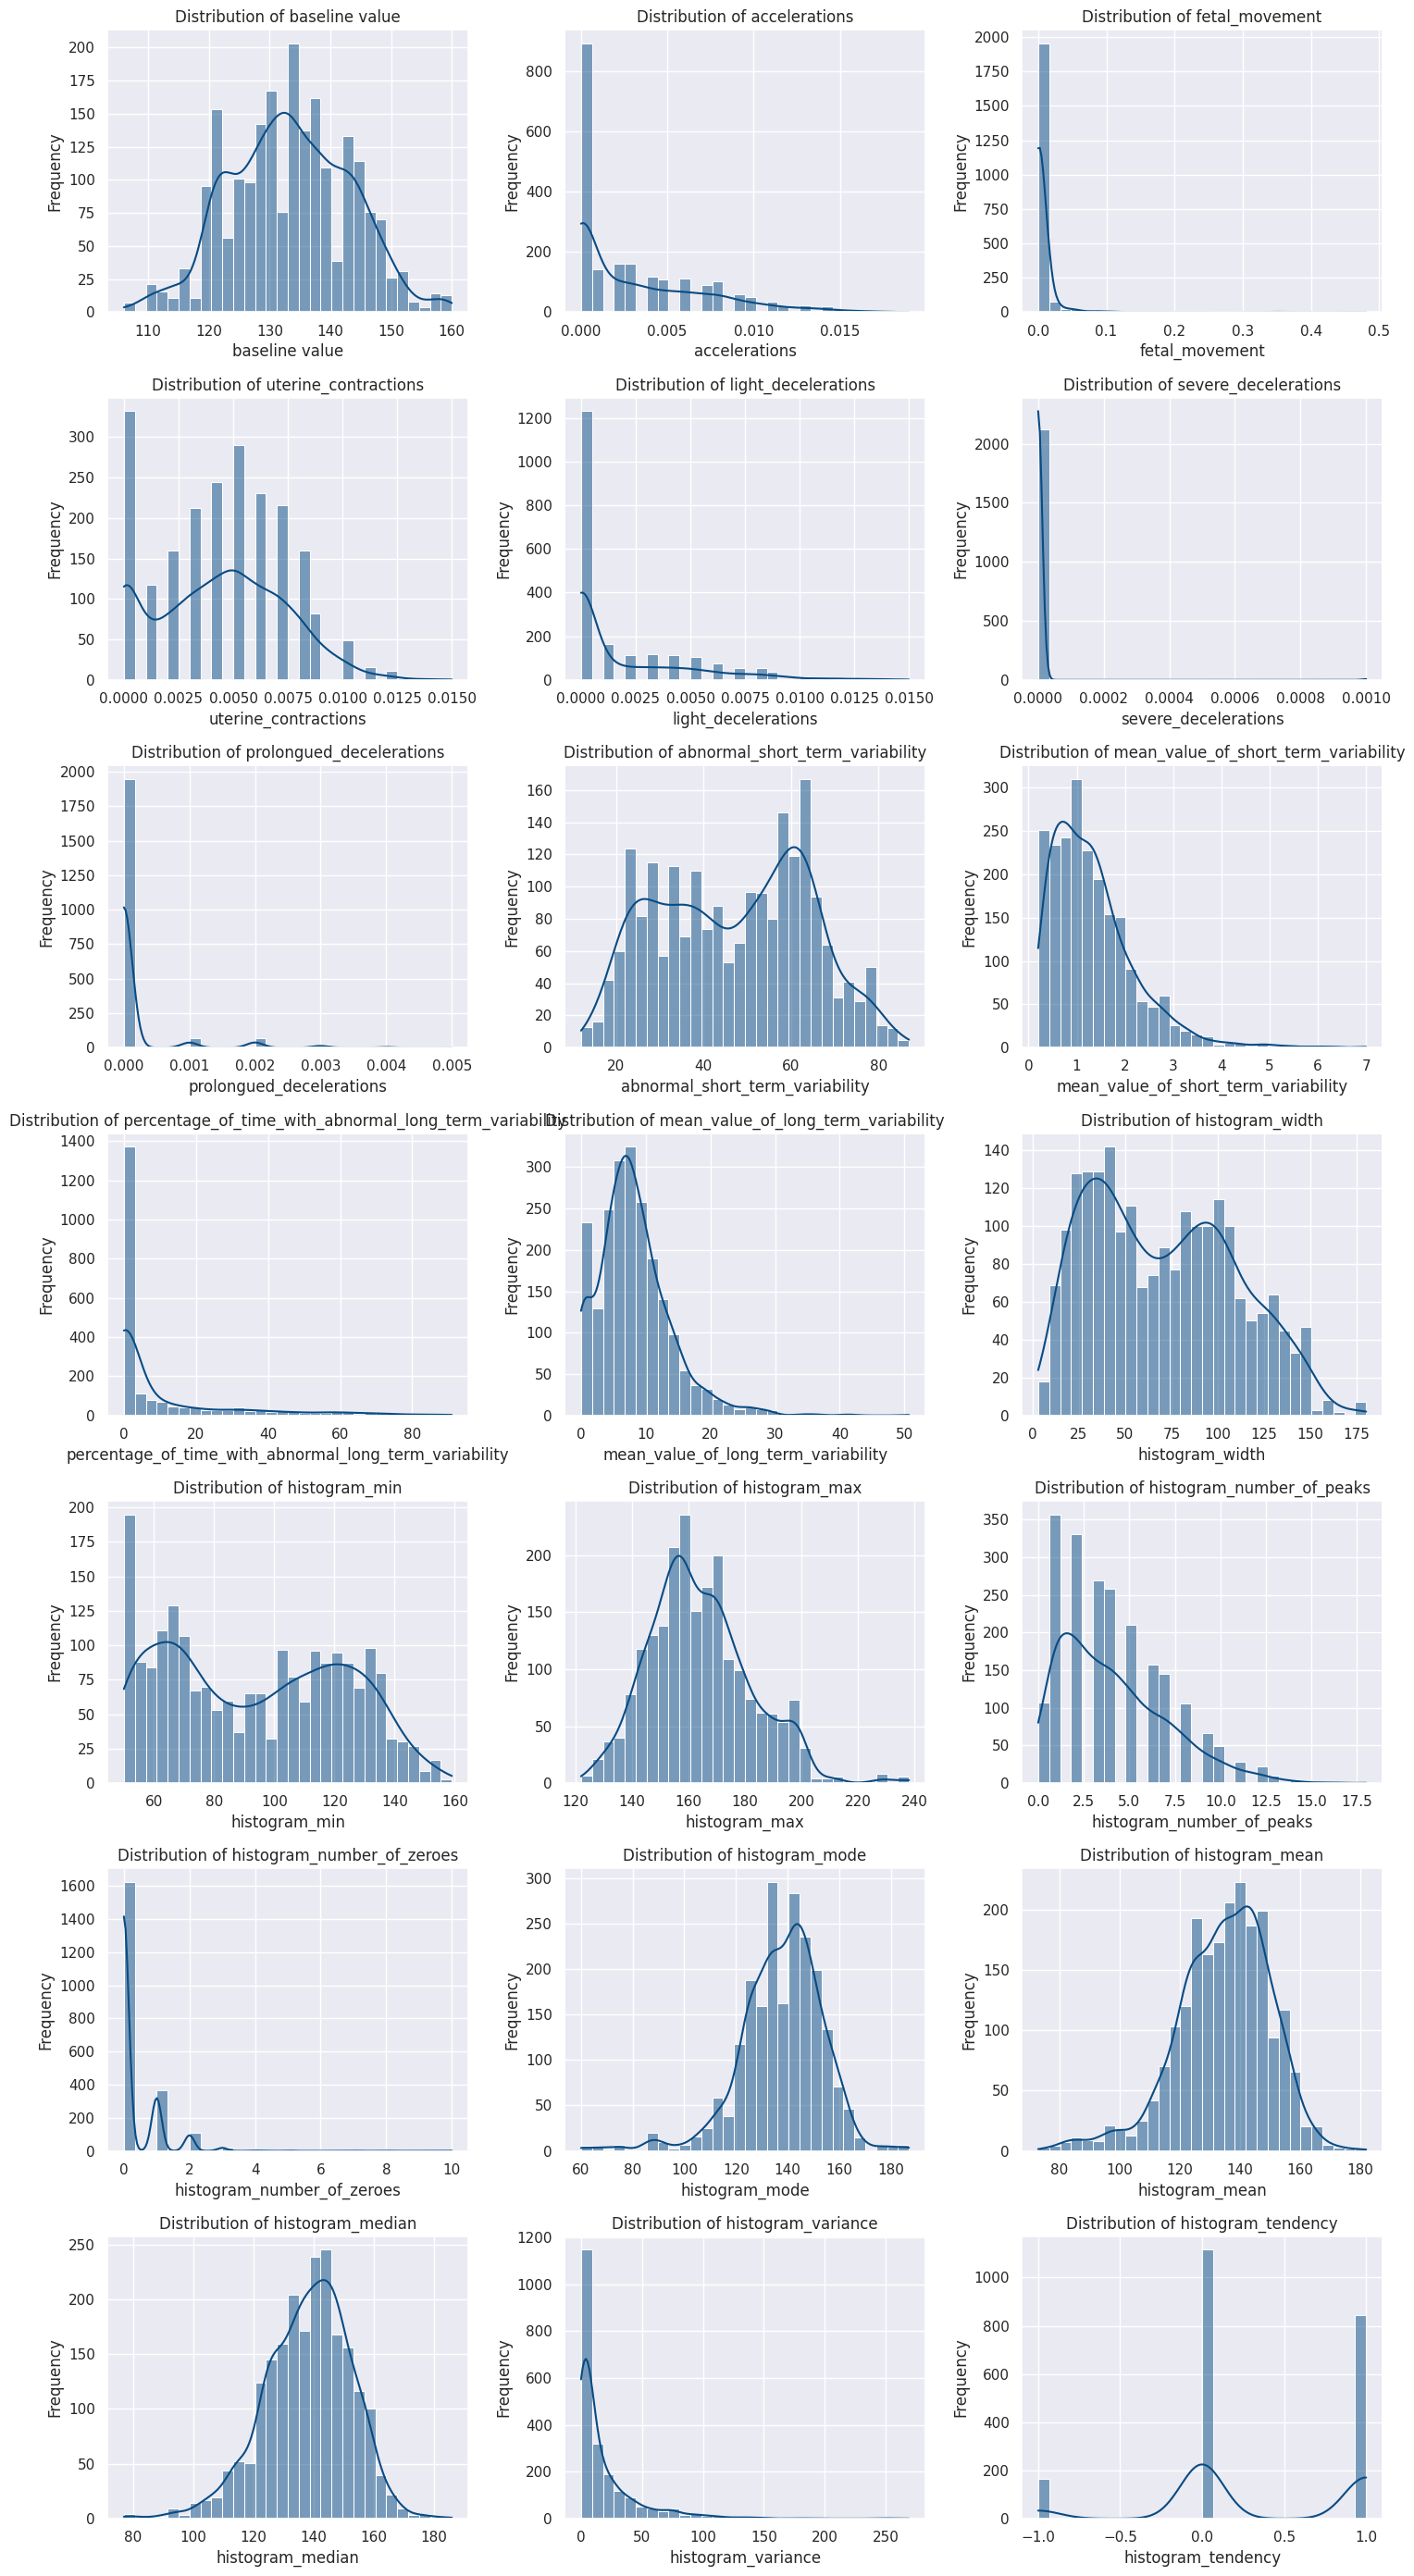

In [ ]:
sns.set_theme(style='darkgrid')
cols = list(data.columns)[:-1]

n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, bins=30, color="#084b83", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**CORRELATION**

<Axes: >

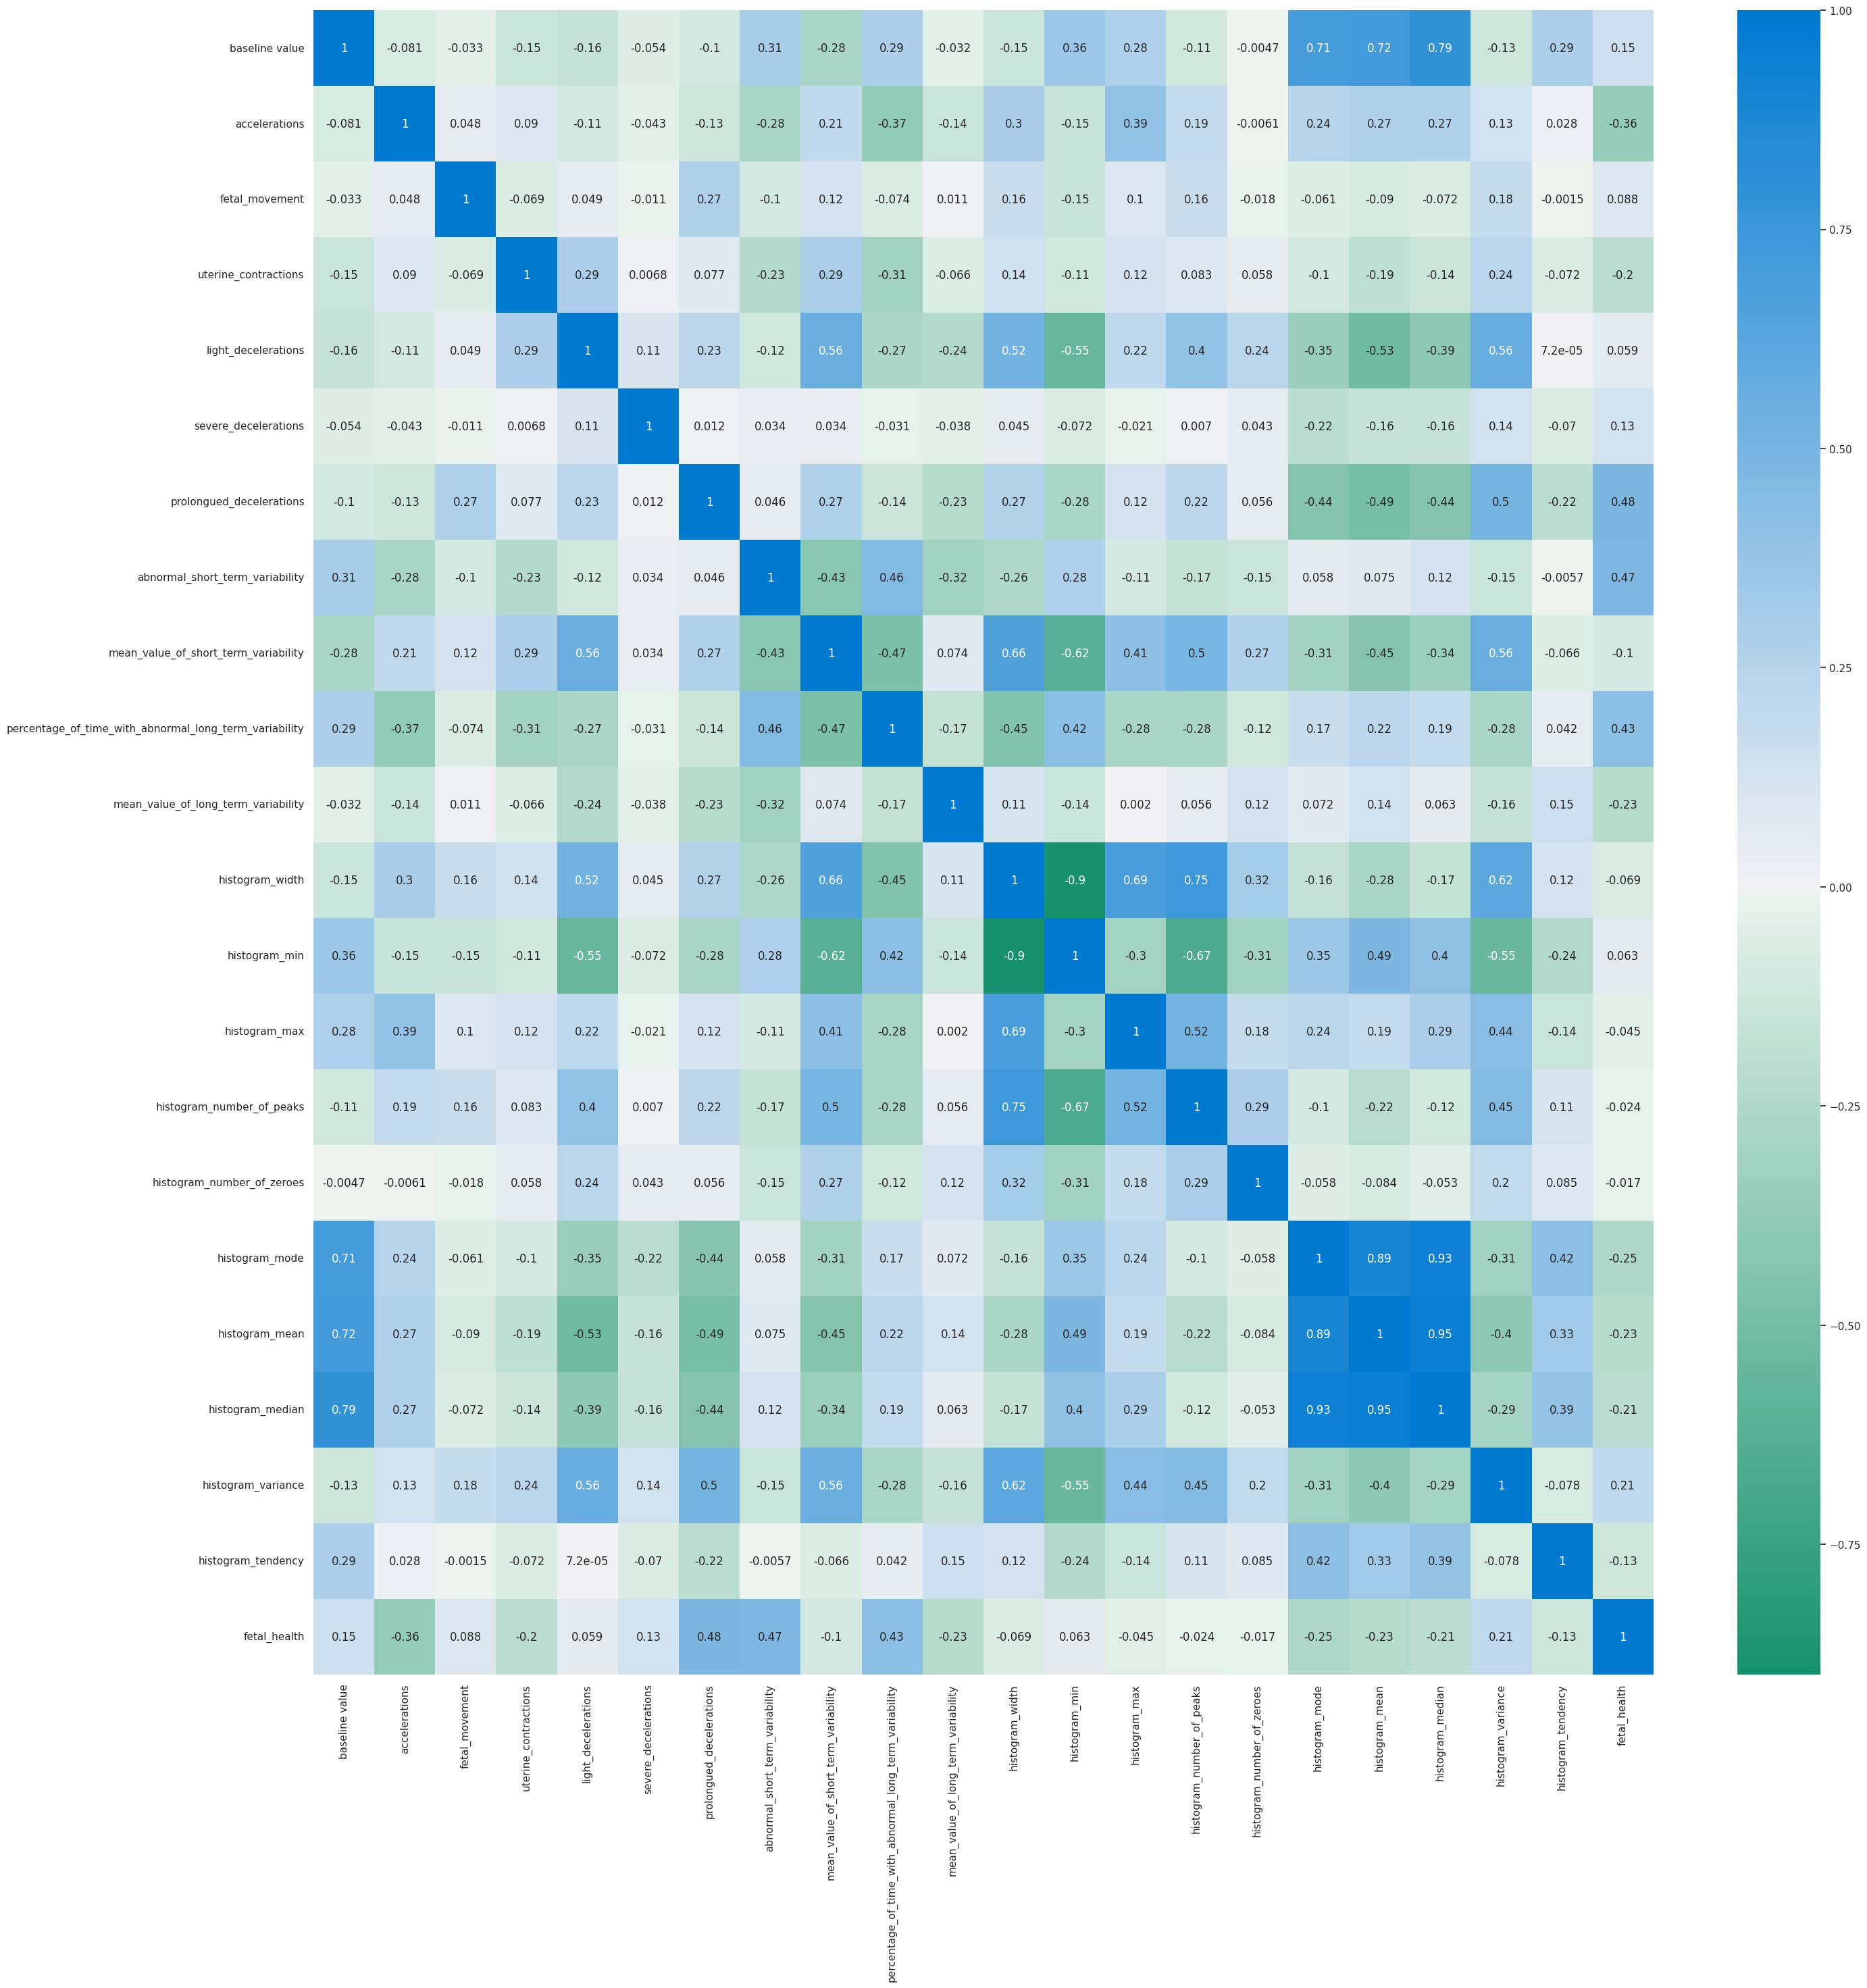

In [ ]:
corr = data.corr()
plt.figure(figsize = (32,32))
cmap= sns.diverging_palette(s = 100, h_neg=150, h_pos=250, as_cmap=True, n = 10)
sns.heatmap(corr,annot=True, center=0, cmap = cmap)

**Splitting data in TRAIN and TEST datasets**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cols = list(data.columns)
cols = cols[:-1]
y = data['fetal_health']
X = data[cols] #getting all the features

s_scaler = StandardScaler()
X= s_scaler.fit_transform(X) #Scaling Features
X = pd.DataFrame(X, columns=cols)

#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# MODELLING

**KNN**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model with default metric (Euclidean)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Train the KNN model on the full training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn:.2f}')

# Display the final model's parameters
print("Final KNN model parameters:", knn_model.get_params())

Cross-validation scores: [0.91946309 0.89932886 0.86241611 0.86531987 0.89225589]
Mean cross-validation score: 0.8877567622534066
Accuracy: 0.91
Final KNN model parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create logistic regression model with default parameters
logreg = linear_model.LogisticRegression()
logreg_model = logreg.fit(X_train, y_train)
print("Logistic Regression Accuracy For Training Data:", logreg_model.score(X_train, y_train))
print("Logistic Regression Accuracy For Testing Data:", logreg_model.score(X_test, y_test))
print("\n")

# Cross validate logistic regression model
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5,
                            n_jobs = 2,
                            scoring = "accuracy")

print("Cross-Validation Accuracy: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", cv_scores.mean())
print("\n")

# Use grid search cv to find good combination of hyperparameters
parameters = { "C": [0.01, 0.1, 1, 10, 100], "intercept_scaling": [1, 2, 3, 4, 5], "tol": [0.0001, 0.0002, 0.0003, 0.0005]}
grid_search_cv = GridSearchCV(estimator=linear_model.LogisticRegression(),
                               param_grid=parameters,
                               cv=5,
                               verbose=1,
                               n_jobs=2,
                               scoring="accuracy",
                               return_train_score=True
                               )

# Fit the model to the training data
grid_search_cv.fit(X_train, y_train);
print("Logistic Regression Model's Best Estimator: ", grid_search_cv.best_estimator_ )
print("Logistic Regression Model's Best Parameters: ", grid_search_cv.best_params_ )
print("Logistic Regression Model's Best Accuracy: ", grid_search_cv.best_score_)
print("\n")

# Based on logistic regression model's best parameters printed, model is rebuilt
logreg_updated = linear_model.LogisticRegression(C=1,
                                                 intercept_scaling=1,
                                                 tol=0.0001, penalty="l2",
                                                 solver="liblinear",
                                                 random_state=42)
logreg_updated_model = logreg_updated.fit(X_train, y_train)
y_pred_logreg = logreg_updated_model.predict(X_test)
print("Logistic Regression (with Best Parameters) Accuracy For Training Data:  ", logreg_updated_model.score(X_train, y_train))
print("Logistic Regression (with Best Parameters) Accuracy For Testing Data:  ", logreg_updated_model.score(X_test, y_test))
print("\n")

Logistic Regression Accuracy For Training Data: 0.9038978494623656
Logistic Regression Accuracy For Testing Data: 0.8793103448275862


Cross-Validation Accuracy:  [0.89261745 0.90604027 0.90604027 0.8956229  0.88888889]
Mean Cross-Validation Accuracy:  0.8978419542177931


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Logistic Regression Model's Best Estimator:  LogisticRegression(C=1)
Logistic Regression Model's Best Parameters:  {'C': 1, 'intercept_scaling': 1, 'tol': 0.0001}
Logistic Regression Model's Best Accuracy:  0.8978419542177931


Logistic Regression (with Best Parameters) Accuracy For Training Data:   0.9025537634408602
Logistic Regression (with Best Parameters) Accuracy For Testing Data:   0.8934169278996865




**SVM**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 3: Train the svc model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Step 4: Test the model
y_train_pred = svc_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred = svc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy For Training Data:", train_accuracy)
print("SVC Accuracy For Testing Data:", accuracy)



# Cross validate SVC model
cv_scores = cross_val_score(svc_model, X_train, y_train, cv=5,
                            n_jobs = 2,
                            scoring = "accuracy")

print("Cross-Validation Accuracy: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", cv_scores.mean())
print("\n")

# Use grid search cv to find good combination of hyperparameters
parameters = { "C": [0.01, 0.1, 1, 10, 100], "kernel": ['rbf', 'linear', 'poly'], "gamma" :['scale']}
grid_search_cv = GridSearchCV(estimator=svc_model,
                               param_grid=parameters,
                               cv=5,
                               verbose=1,
                               n_jobs=2,
                               scoring="accuracy",
                               return_train_score=True
                               )

# Fit the model to the training data
grid_search_cv.fit(X_train, y_train);
print("SVC Model's Best Estimator: ", grid_search_cv.best_estimator_ )
print("SVC Model's Best Parameters: ", grid_search_cv.best_params_ )
print("SVC Model's Best Accuracy: ", grid_search_cv.best_score_)
print("\n")

# Based on svc mode's best paramters printed, model is rebuilt
svc_updated_model = SVC(C= 100, gamma= 'scale', kernel= 'rbf')
svc_updated_model.fit(X_train, y_train)
y_train_pred = svc_updated_model.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_pred_svc = svc_updated_model.predict(X_test)
y_test_accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC (with Best Parameters) Accuracy For Training Data: ", y_train_accuracy)
print("SVC (with Best Parameters) Accuracy For Testing Data:  ", y_test_accuracy_svc)
print("\n")


# Step 5: Predict new data
# Example new data input
new_data = np.array([[120, 0.6, 0.02, 0.5, 10, 60, 30, 0.8, 0.7, 100, 1.2, 1,
                      0.02, 3.5, 70, 0.5, 15, 120, 6, 0.1, 5]])
new_data_df = pd.DataFrame(new_data, columns=X.columns)

# Standardize the new data
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)
new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data_df.columns)
# Make a prediction using the trained svc model
prediction = svc_updated_model.predict(new_data_scaled)

# Map predicted class back to category names
class_mapping = {1: "Normal", 2: "Suspect", 3: "Pathological"}
predicted_class = class_mapping[prediction[0]]

print(f"Prediction for new data: {predicted_class}")

SVC Accuracy For Training Data: 0.926747311827957
SVC Accuracy For Testing Data: 0.9169278996865203
Cross-Validation Accuracy:  [0.89932886 0.89932886 0.90268456 0.89225589 0.90572391]
Mean Cross-Validation Accuracy:  0.8998644159717986


Fitting 5 folds for each of 15 candidates, totalling 75 fits
SVC Model's Best Estimator:  SVC(C=10, random_state=42)
SVC Model's Best Parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Model's Best Accuracy:  0.9220391837841502


SVC (with Best Parameters) Accuracy For Training Data:  0.9899193548387096
SVC (with Best Parameters) Accuracy For Testing Data:   0.9310344827586207


Prediction for new data: Normal


**DECISION TREE AND RANDOM FOREST**

Cross-Validation Accuracy:  [0.94295302 0.90939597 0.93288591 0.93265993 0.95959596]
Mean Cross-Validation Accuracy:  0.9354981583169503


RandomForest Model's Best Estimator:  RandomForestClassifier(max_depth=13, n_estimators=250)
RandomForest Model's Best Parameters:  {'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 250}
RandomForest Model's Best Accuracy:  0.935495898583147


Decicion Tree Accuracy For Training Data:  1.0
Decicion Tree Accuracy For Testing Data:  0.9420062695924765
RandomForestClassifier Accuracy For Training Data:  1.0
RandomForestClassifier Accuracy For Testing Data:  0.945141065830721
RandomForestClassifier(with Best Parameters) Accuracy For Training Data:  0.9979838709677419
RandomForestClassifier(with Best Parameters) Accuracy For Testing Data:  0.9404388714733543
Top 10 Important Features:
                                              Feature  Importance
7                     abnormal_short_term_variability    0.141902
9   percentage_of_time_with_abno

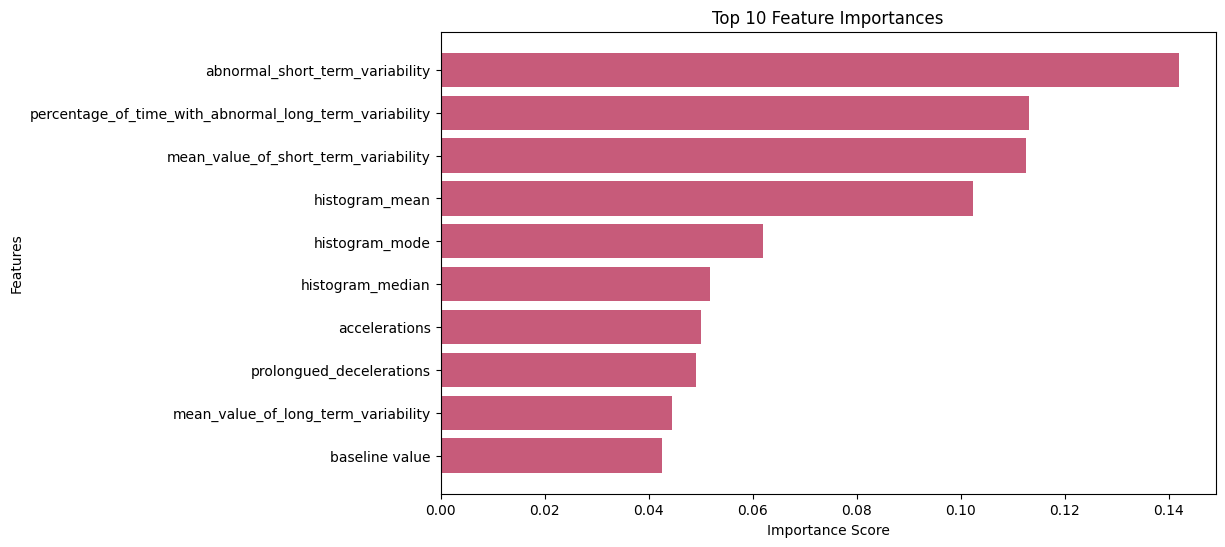

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

dt = DecisionTreeClassifier() #using DecisionTree
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train) # predicting the trainset with DecisionTree
acctraindt = accuracy_score(y_train, y_train_pred)

y_pred = dt.predict(X_test) #prediting for test with DecisionTree
accdt = accuracy_score(y_test, y_pred)

rf = RandomForestClassifier()
rf.fit(X_train, y_train) #using RandomForest

y_train_pred = rf.predict(X_train) # predicting for trainset with RandomForest
acctrainrfc = accuracy_score(y_train, y_train_pred)
y_predrf = rf.predict(X_test)# predicting the testset with RandomForest
accrf = accuracy_score(y_test, y_predrf)


# Cross validate RandomForest model
cv_scores = cross_val_score(rf, X_train, y_train, cv=5,
                            n_jobs = 2,
                            scoring = "accuracy")

print("Cross-Validation Accuracy: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", cv_scores.mean())
print("\n")

#hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [250, 300, 350],
    'max_features': ['sqrt', 'auto'],
    'max_depth' : [11, 12, 13],
    }

grid = GridSearchCV(RandomForestClassifier(),cv = 5,  param_grid=params)
grid.fit(X_train, y_train) # training it on GridSearchCV


print("RandomForest Model's Best Estimator: ", grid.best_estimator_ )
print("RandomForest Model's Best Parameters: ", grid.best_params_ )
print("RandomForest Model's Best Accuracy: ", grid.best_score_)
print("\n")


best_param = grid.best_params_ #getting the best parameters

rfbest_model = RandomForestClassifier( max_depth=11, max_features='sqrt', n_estimators=250) #implementing those best parameters
rfbest_model.fit(X_train, y_train)
y_train_pred = rfbest_model.predict(X_train) # predicting the trainset with RandomForest using the best parameters
acctrainrfbest = accuracy_score(y_train, y_train_pred)

y_pred_rfbest =rfbest_model.predict(X_test) # predicting the testset with RandomForest using the best parameters
acccuracy= accuracy_score(y_test,y_pred_rfbest)

print("Decicion Tree Accuracy For Training Data: ", acctraindt)
print("Decicion Tree Accuracy For Testing Data: ", accdt)

print("RandomForestClassifier Accuracy For Training Data: ", acctrainrfc)
print("RandomForestClassifier Accuracy For Testing Data: ", accrf)

print("RandomForestClassifier(with Best Parameters) Accuracy For Training Data: ", acctrainrfbest)
print("RandomForestClassifier(with Best Parameters) Accuracy For Testing Data: ", acccuracy)


if not hasattr(X_train, 'columns'):
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
else:
    feature_names = X_train.columns

# Feature importance from the best Random Forest model
feature_importances = rfbest_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='#C75B7A')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

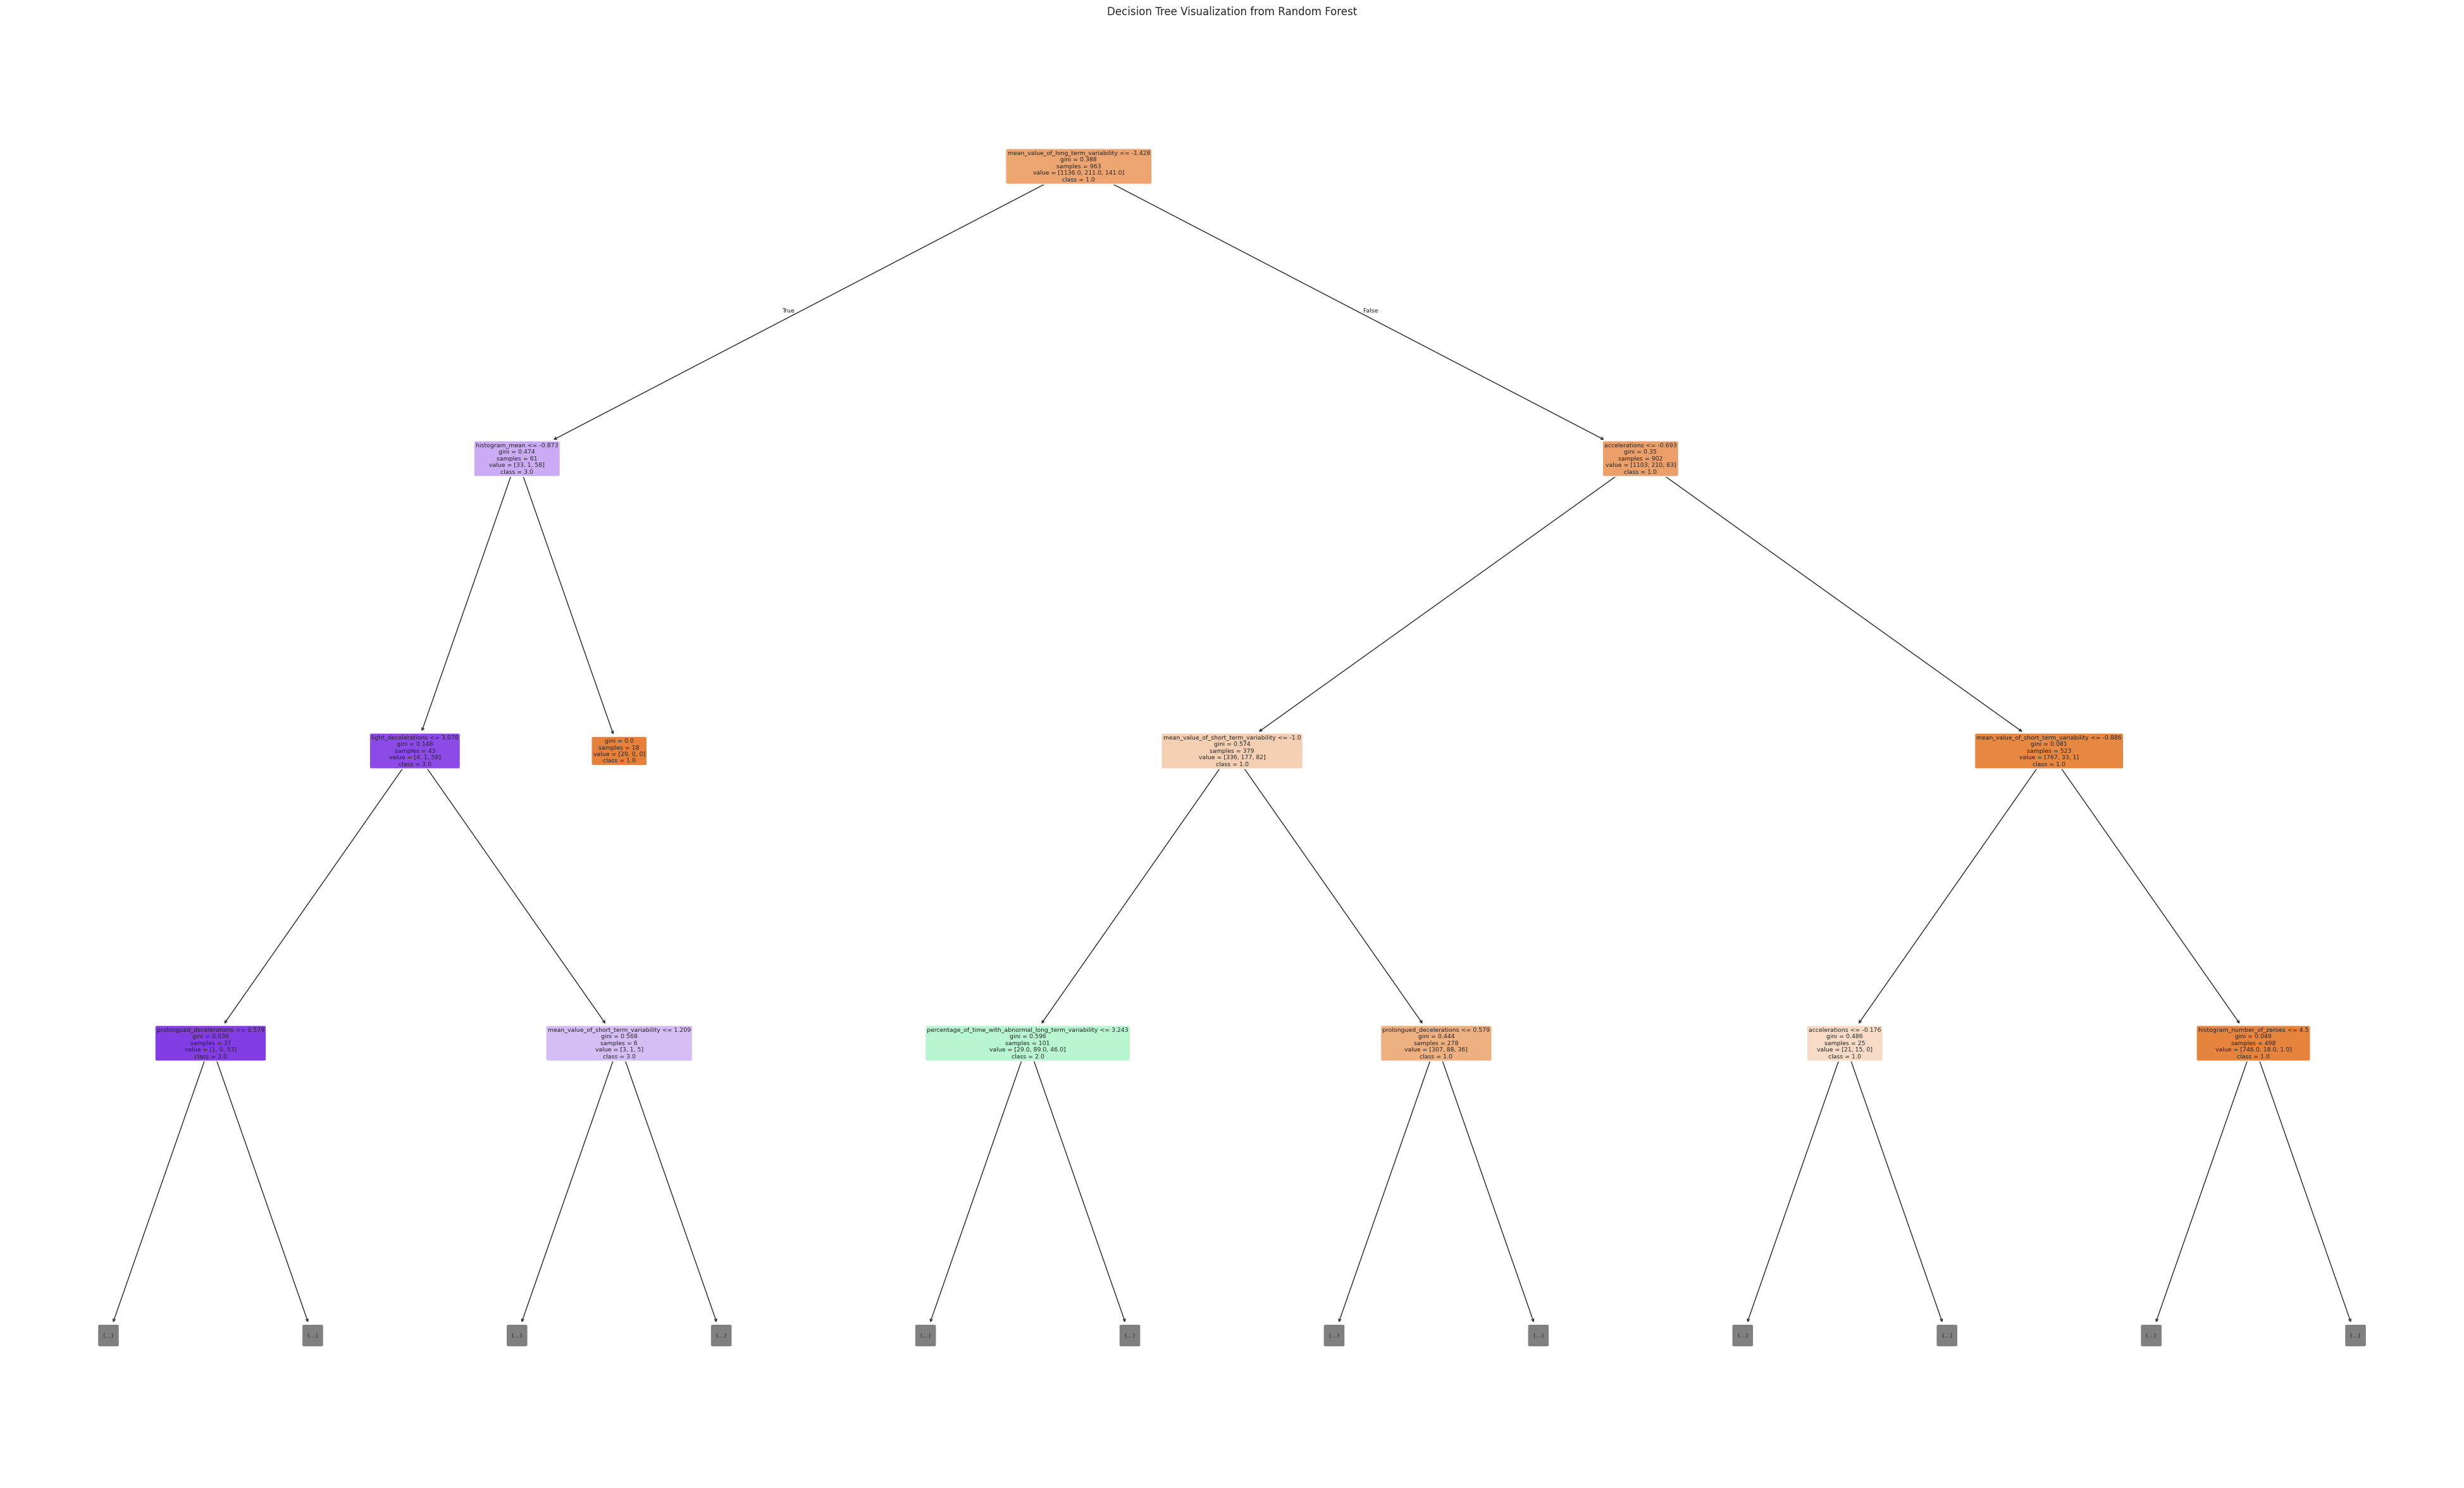

In [ ]:
# Visualize the tree
from sklearn.tree import plot_tree

max_depth = 3
tree = rfbest_model.estimators_[0]

plt.figure(figsize=(50, 30))
plot_tree(tree, feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
          class_names=[str(cls) for cls in set(y_train)],
          max_depth=max_depth, filled=True, rounded=True)
plt.title("Decision Tree Visualization from Random Forest")
plt.show()

# MODEL COMPARISON

**Accuracy and Error**

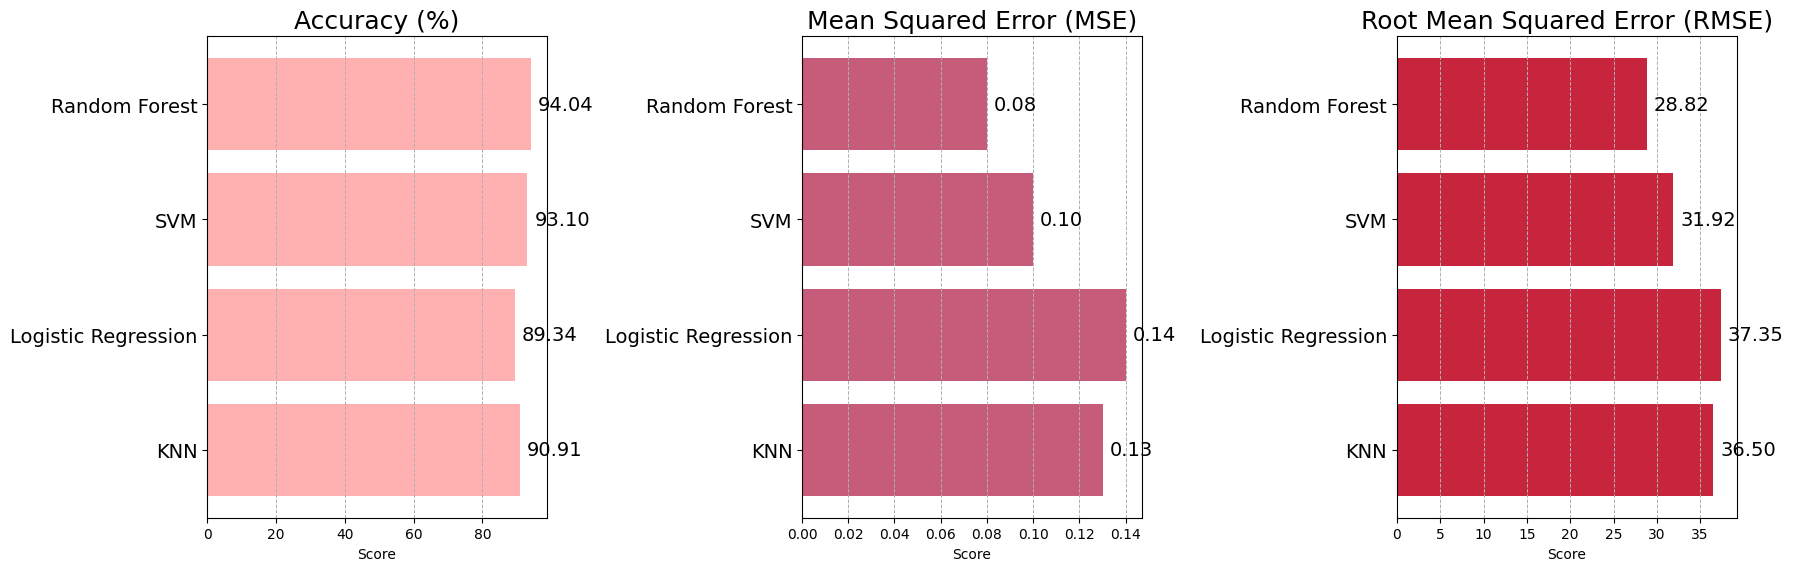

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, mean_squared_error, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score)
from sklearn.preprocessing import label_binarize

# Models and their predictions
models = ['KNN', 'Logistic Regression', 'SVM', 'Random Forest']
predictions = [y_pred_knn, y_pred_logreg, y_pred_svc, y_pred_rfbest]

# Metrics calculation
accuracy = [accuracy_score(y_test, pred) * 100 for pred in predictions]
mse = [mean_squared_error(y_test, pred) for pred in predictions]
rmse = [np.sqrt(mse[i]) * 100 for i in range(len(mse))]

# Horizontal bar plot for accuracy, MSE, and RMSE
metrics = [accuracy, mse, rmse]
metric_titles = ['Accuracy (%)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']
colors = ['#FFB0B0','#C75B7A','#C7253E']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, ax in enumerate(axes):
    values = [round(m, 2) for m in metrics[i]]
    bars = ax.barh(models, values, color=colors[i % len(colors)])
    for bar in bars:
        ax.annotate(f'{bar.get_width():.2f}', xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=14)
    ax.set_title(metric_titles[i],fontsize=18)
    ax.set_xlabel('Score')
    ax.grid(axis='x', linestyle='--', linewidth=0.7)
    ax.tick_params(axis='y', labelsize=14)
#plt.suptitle('Model Performance Comparison', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Confusion Matrices**

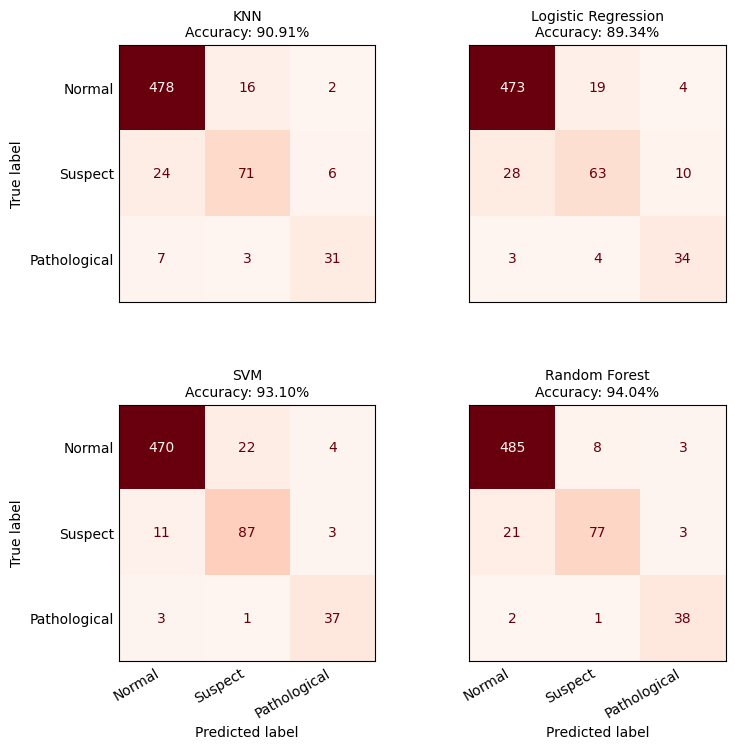

In [ ]:
# Confusion Matrices & Confusion Matrix Accuracy
confusion_matrices = [confusion_matrix(y_test, pred) for pred in predictions]
conf_matrix_accuracy = [(np.trace(matrix) / float(np.sum(matrix))) * 100 for matrix in confusion_matrices]

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for i, (ax, matrix) in enumerate(zip(axes.flatten(), confusion_matrices)):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_names)
    disp.plot(ax=ax, cmap='Reds', colorbar=False)

    accuracy_text = f"Accuracy: {conf_matrix_accuracy[i]:.2f}%"
    ax.set_title(f"{models[i]}\n{accuracy_text}", fontsize=10)

    ax.tick_params(labelleft=(i % 2 == 0), labelbottom=(i >= 2), length=0)
    if i % 2 == 1:
        ax.set_ylabel('')
    if i < 2:
        ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

#plt.suptitle("Confusion Matrices with Accuracy for Different Models", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

**Precision, Recall and F1 Scores**

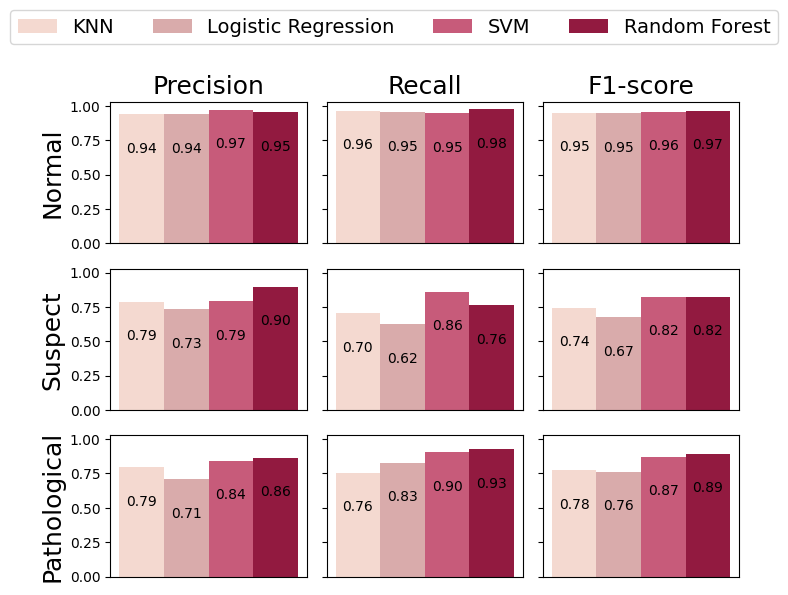

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Define class names and their corresponding labels
class_names = ['Normal', 'Suspect', 'Pathological']
class_labels = [1, 2, 3]

# Generate classification reports as dictionaries
reports = [classification_report(y_test, pred, labels=class_labels, target_names=class_names, output_dict=True) for pred in predictions]

# Automatically extract Precision, Recall, and F1 scores for each model and class
metrics = ['precision', 'recall', 'f1-score']
model_metrics = {model: {metric: [report[class_][metric] for class_ in class_names] for metric in metrics} for model, report in zip(models, reports)}

# Create the figure and axis objects
fig, axes = plt.subplots(3, 3, figsize=(12, 6), sharey=True)
bar_width = 0.1
index = np.arange(len(class_names))
colors = ['#F4D9D0', '#D9ABAB','#C75B7A','#921A40']

# Plot for each class and metric
for i, class_name in enumerate(class_names):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]

        for k, model in enumerate(models):
            bar = ax.bar(k * bar_width + index[i] - (1.5 * bar_width),model_metrics[model][metric][i],bar_width,
                         label=f"{model}" if i == 0 and j == 0 else "",color=colors[k])

            for rect in bar:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width() / 2, height-0.3, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

        if i == 0:
            ax.set_title(f'{metric.capitalize()}', fontsize=18)
        if j == 0:
            ax.set_ylabel(f'{class_name}', fontsize=18)
        ax.set_xticks([])

# Legend, title, and layout
fig.legend(models, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.03), fontsize=14)
#fig.suptitle('Comparison of Precision, Recall, and F1-Score Across Models', fontsize=18, y=0.95)
plt.tight_layout(rect=[0.2, 0.03, 0.8, 0.93])
plt.show()

ROC Curves

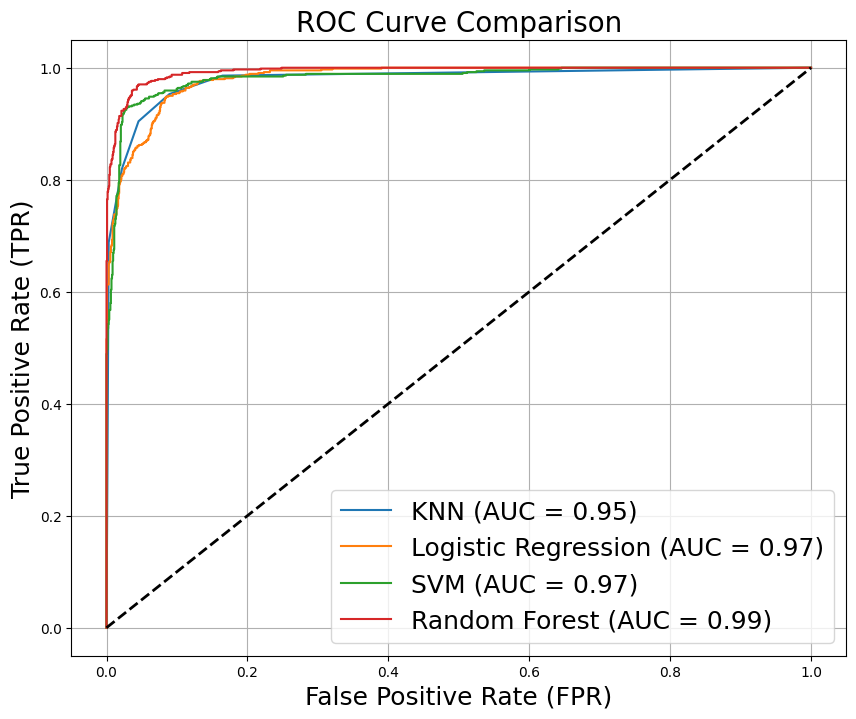

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize y_test for multiclass case
y_test_binarized = label_binarize(y_test, classes=class_labels)

# Store model probabilities/decision functions
probabilities = [
    knn_model.predict_proba(X_test),
    logreg_model.predict_proba(X_test),
    svc_updated_model.decision_function(X_test) if len(class_labels) > 2 else svc_updated_model.predict_proba(X_test),
    rfbest_model.predict_proba(X_test)]

# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, y_prob in zip(models, probabilities):
    if y_prob.ndim > 1 and y_prob.shape[1] > 1:
        # Multiclass ROC calculation
        fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
        auc_score = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')
    else:
        # Binary ROC calculation
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1] if y_prob.ndim > 1 else y_prob)
        auc_score = roc_auc_score(y_test, y_prob[:, 1] if y_prob.ndim > 1 else y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal baseline
plt.xlabel('False Positive Rate (FPR)',fontsize=18)
plt.ylabel('True Positive Rate (TPR)',fontsize=18)
plt.title('ROC Curve Comparison',fontsize=20)
plt.legend(loc='lower right', fontsize=18)
plt.grid(True)
plt.show()

# **Model Comparision Summary**

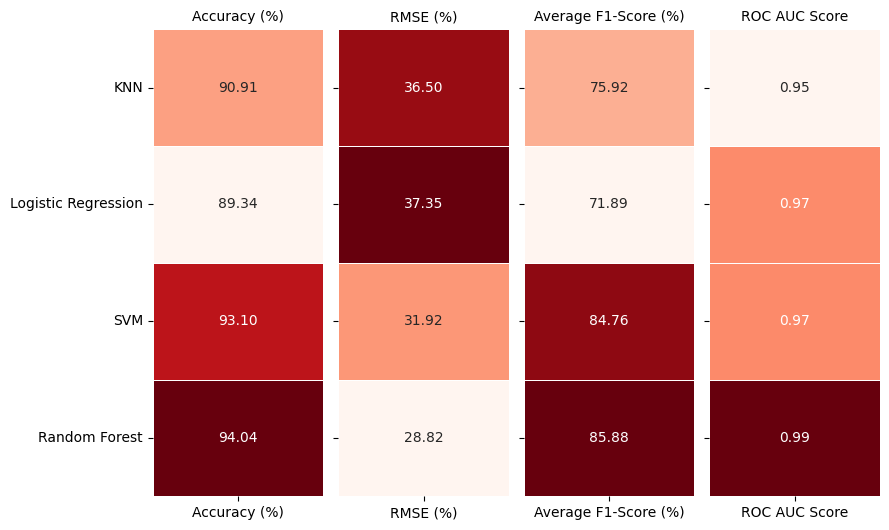

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming models, y_test, predictions, confusion_matrices, accuracy, rmse, class_labels, and class_names are already defined

# Calculate F1-Score for suspect and pathological classes
average_f1 = []
for pred in predictions:
    f1 = f1_score(y_test, pred, average=None)  # Class-wise F1-Score
    suspect_pathological_f1 = f1[-2:].mean()  # Average F1-Score across "suspect" and "pathological"
    average_f1.append(suspect_pathological_f1 * 100)  # Convert to percentage

# Confusion Matrix Accuracy
conf_matrix_accuracy = [
    (np.trace(matrix) / float(np.sum(matrix))) * 100 for matrix in confusion_matrices
]

# ROC AUC scores
probabilities = [
    knn_model.predict_proba(X_test),
    logreg_model.predict_proba(X_test),
    svc_updated_model.decision_function(X_test) if len(class_labels) > 2 else svc_updated_model.predict_proba(X_test),
    rfbest_model.predict_proba(X_test)
]

roc_auc_scores = []
y_test_binarized = label_binarize(y_test, classes=class_labels)
for y_prob in probabilities:
    if y_prob.ndim > 1 and y_prob.shape[1] > 1:
        auc_score = roc_auc_score(y_test_binarized, y_prob, multi_class='ovr')
    else:
        auc_score = roc_auc_score(y_test, y_prob[:, 1] if y_prob.ndim > 1 else y_prob)
    roc_auc_scores.append(auc_score)

# Prepare the DataFrame for the heatmap (Reordered metrics)
summary_data = []
for i in range(len(models)):
    summary_data.append([
        accuracy[i],             # Accuracy
        rmse[i],                 # RMSE
        average_f1[i],           # Average F1-Score (Suspect & Pathological)
        roc_auc_scores[i],       # ROC AUC score
    ])

# Define the order of columns
columns = ['Accuracy (%)', 'RMSE (%)', 'Average F1-Score (%)', 'ROC AUC Score']
df_summary = pd.DataFrame(summary_data, columns=columns, index=models)

# Normalize for heatmap (Optional step to scale values to [0,1])
df_normalized = df_summary.copy()
for col in df_summary.columns:
    df_normalized[col] = (df_summary[col] - df_summary[col].min()) / (df_summary[col].max() - df_summary[col].min())

# Plot heatmap with different colors for each metric
fig, axes = plt.subplots(1, len(df_summary.columns), figsize=(15, 6), sharey=True)

for idx, (ax, col) in enumerate(zip(axes, df_summary.columns)):
    sns.heatmap(
        df_normalized[[col]],
        annot=df_summary[[col]],
        cmap='Reds',
        cbar=False,
        fmt='.2f',
        linewidths=0.5,
        ax=ax
    )
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("")
    ax.tick_params(axis='y', rotation=0)

# Title and layout adjustments
#plt.suptitle('Model Performance Metrics', fontsize=16, y=0.95)
plt.tight_layout(rect=[0.2, 0.03, 0.8, 0.93])
plt.show()